In [ ]:
#Logistic Regression is used to predict discrete categories, where classification is binary either 0 or 1

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [15]:
train=pd.read_csv('titanic_train-Copy1.csv')
test=pd.read_csv('titanic_test-Copy1.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot: >

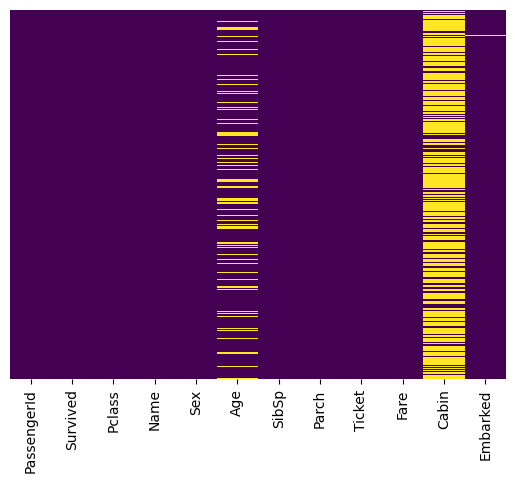

In [18]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis') #basically give what is null. Cabin is missing a lot of data

In [19]:
sns.set_style('whitegrid')

<AxesSubplot: xlabel='Survived', ylabel='count'>

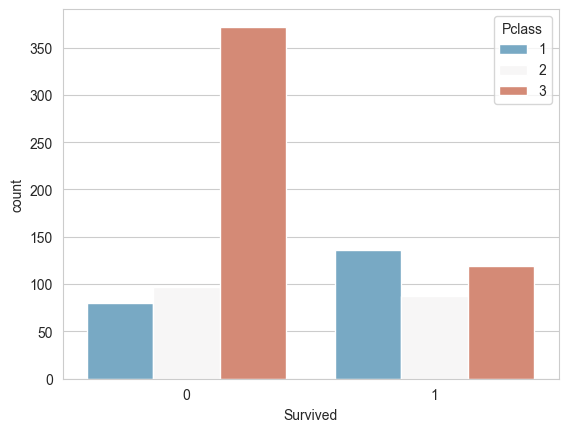

In [23]:
sns.countplot(x='Survived',data=train,hue='Pclass',palette='RdBu_r') #hue is used when the data is binary i.e either survived or not

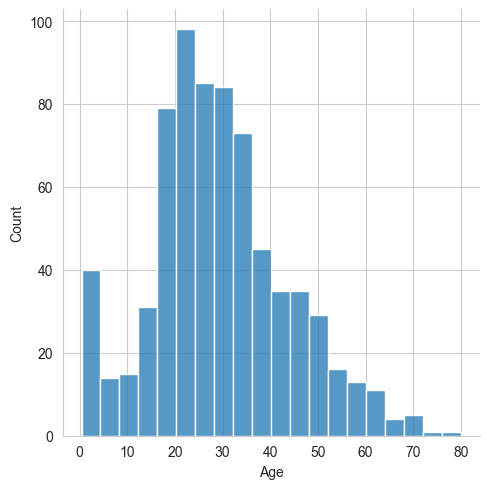

In [25]:
sns.displot(train['Age'].dropna())

<AxesSubplot: xlabel='SibSp', ylabel='count'>

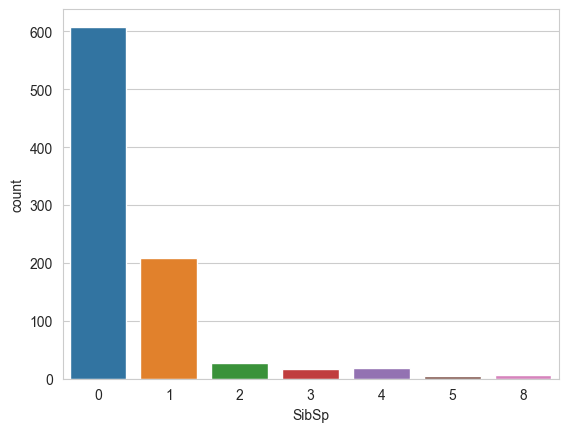

In [27]:
sns.countplot(x='SibSp',data=train)

In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot: xlabel='Pclass', ylabel='Fare'>

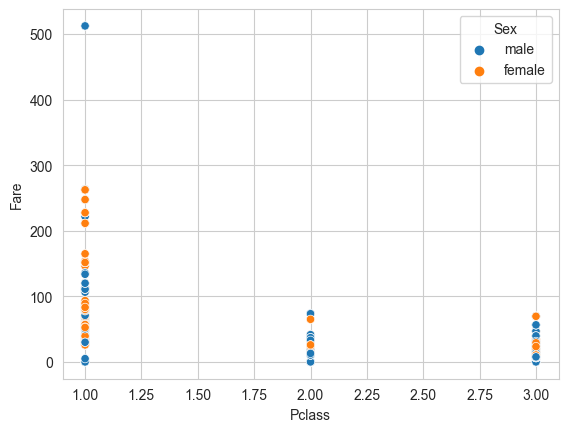

In [33]:
sns.scatterplot(data=train,y='Fare',x='Pclass',hue='Sex')

<AxesSubplot: >

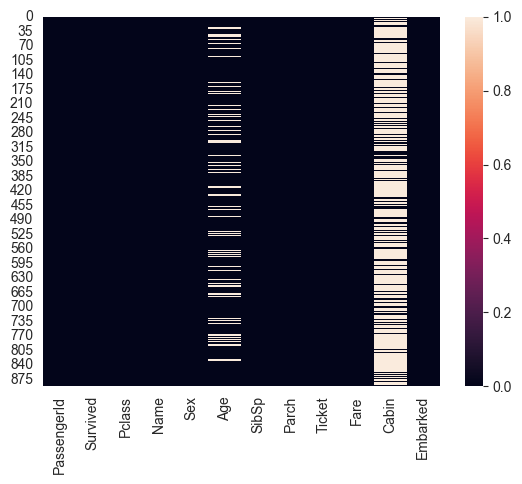

In [34]:
sns.heatmap(train.isnull()) #insted of getting the null values , we can  fill mean age , called imputation, or we can do age by passenge class 

<AxesSubplot: xlabel='Pclass', ylabel='Age'>

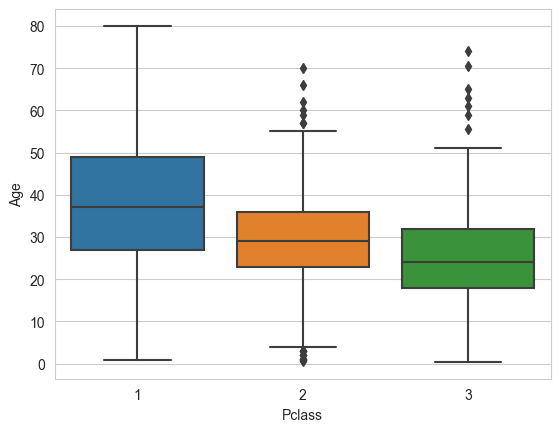

In [35]:
sns.boxplot(x='Pclass',y='Age',data=train)

In [41]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    if(pd.isnull(Age)):
        if(Pclass==1):
            return 37
        elif Pclass==2:
            return 29
        else :
            return 24
    else:
        return Age

<AxesSubplot: >

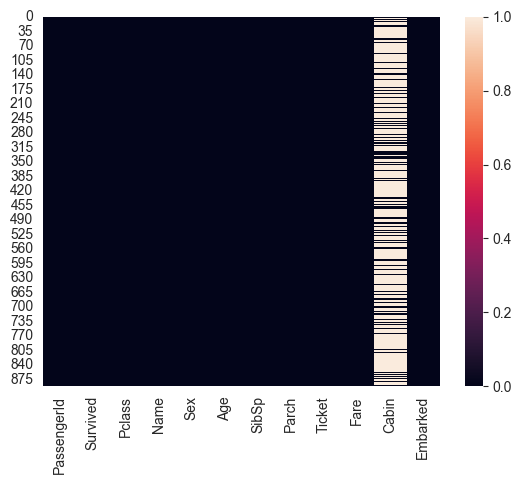

In [45]:
train['Age']=train[['Age','Pclass']].apply(impute_age,axis=1)
sns.heatmap(train.isnull())

In [52]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [58]:
#To convert categorical data to a column for algorithm to work 
sex=pd.get_dummies(train['Sex'],drop_first=True)
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [59]:
embark=pd.get_dummies(train['Embarked'],drop_first=True)
embark

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [72]:
train.drop(['Sex','Name','male','Q','S','Embarked'],axis=1,inplace=True)


In [73]:
train

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare
0,1,0,3,22.0,1,0,A/5 21171,7.2500
1,2,1,1,38.0,1,0,PC 17599,71.2833
2,3,1,3,26.0,0,0,STON/O2. 3101282,7.9250
3,4,1,1,35.0,1,0,113803,53.1000
4,5,0,3,35.0,0,0,373450,8.0500
...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,211536,13.0000
887,888,1,1,19.0,0,0,112053,30.0000
888,889,0,3,24.0,1,2,W./C. 6607,23.4500
889,890,1,1,26.0,0,0,111369,30.0000


In [74]:
train=pd.concat([train,embark,sex],axis=1)


In [76]:
train.drop('PassengerId',axis=1)

,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Q,S,male
0,0,3,22.0,1,0,A/5 21171,7.2500,0,1,1
1,1,1,38.0,1,0,PC 17599,71.2833,0,0,0
2,1,3,26.0,0,0,STON/O2. 3101282,7.9250,0,1,0
3,1,1,35.0,1,0,113803,53.1000,0,1,0
4,0,3,35.0,0,0,373450,8.0500,0,1,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,211536,13.0000,0,1,1
887,1,1,19.0,0,0,112053,30.0000,0,1,0
888,0,3,24.0,1,2,W./C. 6607,23.4500,0,1,0
889,1,1,26.0,0,0,111369,30.0000,0,0,1


In [96]:
X=train.drop(['Ticket','Survived'],axis=1)
y=train['Survived']


In [97]:
from sklearn.model_selection import train_test_split

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [84]:
from sklearn.linear_model import LogisticRegression

In [99]:
logmodel=LogisticRegression()

In [100]:
logmodel.fit(X_train,y_train)

/Users/rayanbhat/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [101]:
predictions=logmodel.predict(X_test)

In [104]:
from sklearn.metrics import classification_report

In [1]:
pd.Dataframe(classification_report(y_test,predictions,output_dict=True))

NameError: name 'pd' is not defined

In [106]:
from sklearn.metrics import confusion_matrix

In [107]:
confusion_matrix(y_test,predictions)

array([[148,  15],
       [ 39,  65]])